In [14]:
import pandas as pd

df = pd.read_csv('./datasets/cities_r2.csv')

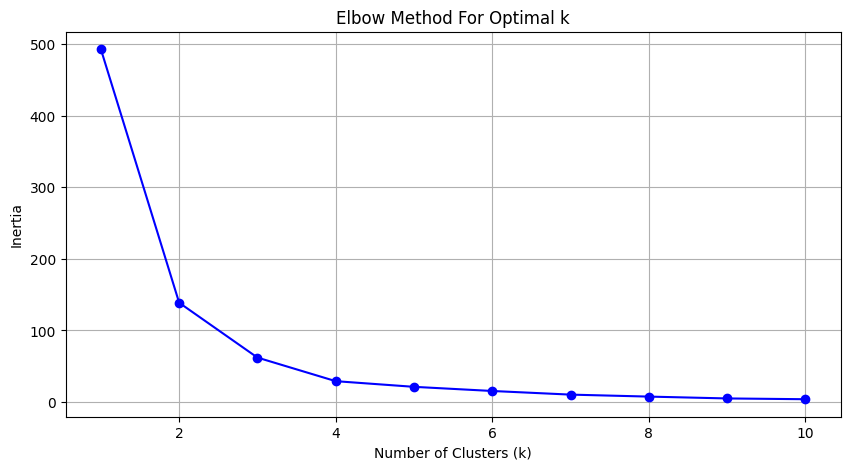

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Prepare data for clustering
X = df[['total_graduates']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=62, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

Cluster distribution:
Cluster
0    481
1      3
2      9
Name: count, dtype: int64

Cluster centers (scaled):
[[-0.12968682]
 [10.1630973 ]
 [ 3.54334118]]


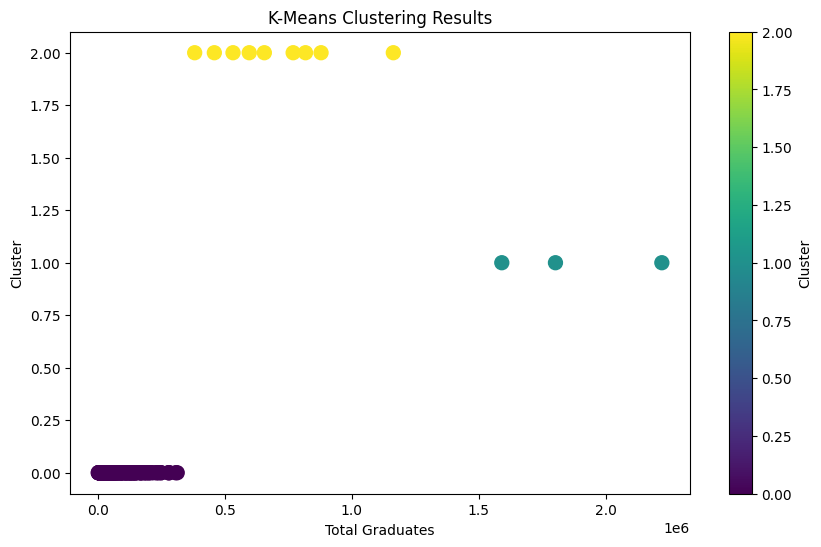

In [19]:
# Apply K-Means with optimal k
optimal_k = 3  # Adjust based on elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=62, n_init=50)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View cluster distribution
print("Cluster distribution:")
print(df['Cluster'].value_counts().sort_index())

# View cluster centers
print("\nCluster centers (scaled):")
print(kmeans.cluster_centers_)

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['total_graduates'], df['Cluster'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Total Graduates')
plt.ylabel('Cluster')
plt.title('K-Means Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

In [28]:
new_city = pd.DataFrame({
    'total_graduates': [750000]  # Example: a city with 75,000 graduates
})

# Standardize using the same scaler from training
new_city_scaled = scaler.transform(new_city)

# Predict cluster
predicted_cluster = kmeans.predict(new_city_scaled)

print(f"City with {new_city['total_graduates'].values[0]} graduates belongs to Cluster {predicted_cluster[0]}")


City with 750000 graduates belongs to Cluster 2
